In [111]:
"om"

'om'

**Loading Dataset**

Loading California_housing dataset 

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [114]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [116]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [117]:
housing.target_names

['MedHouseVal']

In [118]:
housing.data #Data retated to coloumns MedInc,HouseAge,AveRooms,AveBedrooms,Population,AveOccups,Latitude,Longitude

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [119]:
housing.target #Price of house

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

**Preparing Dataset and Analysis**

In [127]:
dataset = pd.DataFrame(housing.data,columns = housing.feature_names)
dataset.head(12) #Displaying 10 starting rows

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [128]:
dataset.shape

(20640, 8)

In [129]:
dataset['Price'] = housing.target
dataset.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [130]:
#Keeping only 10,000 rows in dataset
dataset = dataset.iloc[:10000]
dataset.shape

(10000, 9)

In [131]:
dataset.info() #information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      10000 non-null  float64
 1   HouseAge    10000 non-null  float64
 2   AveRooms    10000 non-null  float64
 3   AveBedrms   10000 non-null  float64
 4   Population  10000 non-null  float64
 5   AveOccup    10000 non-null  float64
 6   Latitude    10000 non-null  float64
 7   Longitude   10000 non-null  float64
 8   Price       10000 non-null  float64
dtypes: float64(9)
memory usage: 703.3 KB


In [132]:
dataset.describe() #statistical

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,3.718040,31.847100,5.212102,1.090389,1395.588700,3.061855,35.493820,-119.472328,2.04949
std,1.916912,11.821967,2.752832,0.547035,1090.838717,6.098183,1.959545,1.808913,1.16595
min,0.499900,1.000000,0.846154,0.500000,3.000000,0.750000,32.670000,-124.350000,0.14999
25%,2.411900,23.000000,4.253385,1.007078,779.750000,2.452830,34.010000,-121.590000,1.17975
50%,3.328900,33.000000,5.031476,1.049645,1137.500000,2.851168,34.170000,-118.410000,1.76600
75%,4.544825,40.000000,5.830935,1.097466,1687.000000,3.373184,37.630000,-118.210000,2.58025
max,15.000100,52.000000,141.909091,34.066667,28566.000000,599.714286,41.950000,-114.550000,5.00001


In [133]:
dataset.isnull().sum()  #No null values exists in dataset

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [134]:
#Visualizing correlation
corr = dataset.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.051468,0.298793,-0.046921,0.001514,-0.009746,-0.072834,0.001121,0.694943
HouseAge,-0.051468,1.000000,-0.102508,-0.076112,-0.309498,0.005616,-0.194754,0.090471,0.110259
AveRooms,0.298793,-0.102508,1.000000,0.878494,-0.091860,-0.010819,0.179844,-0.110741,0.143936
AveBedrms,-0.046921,-0.076112,0.878494,1.000000,-0.060489,-0.005746,0.100627,-0.029811,-0.029614
Population,0.001514,-0.309498,-0.091860,-0.060489,1.000000,0.055340,-0.119479,0.101658,0.011974
AveOccup,-0.009746,0.005616,-0.010819,-0.005746,0.055340,1.000000,-0.005020,0.026202,-0.056045
Latitude,-0.072834,-0.194754,0.179844,0.100627,-0.119479,-0.005020,1.000000,-0.934870,-0.259326
Longitude,0.001121,0.090471,-0.110741,-0.029811,0.101658,0.026202,-0.934870,1.000000,0.114537
Price,0.694943,0.110259,0.143936,-0.029614,0.011974,-0.056045,-0.259326,0.114537,1.000000


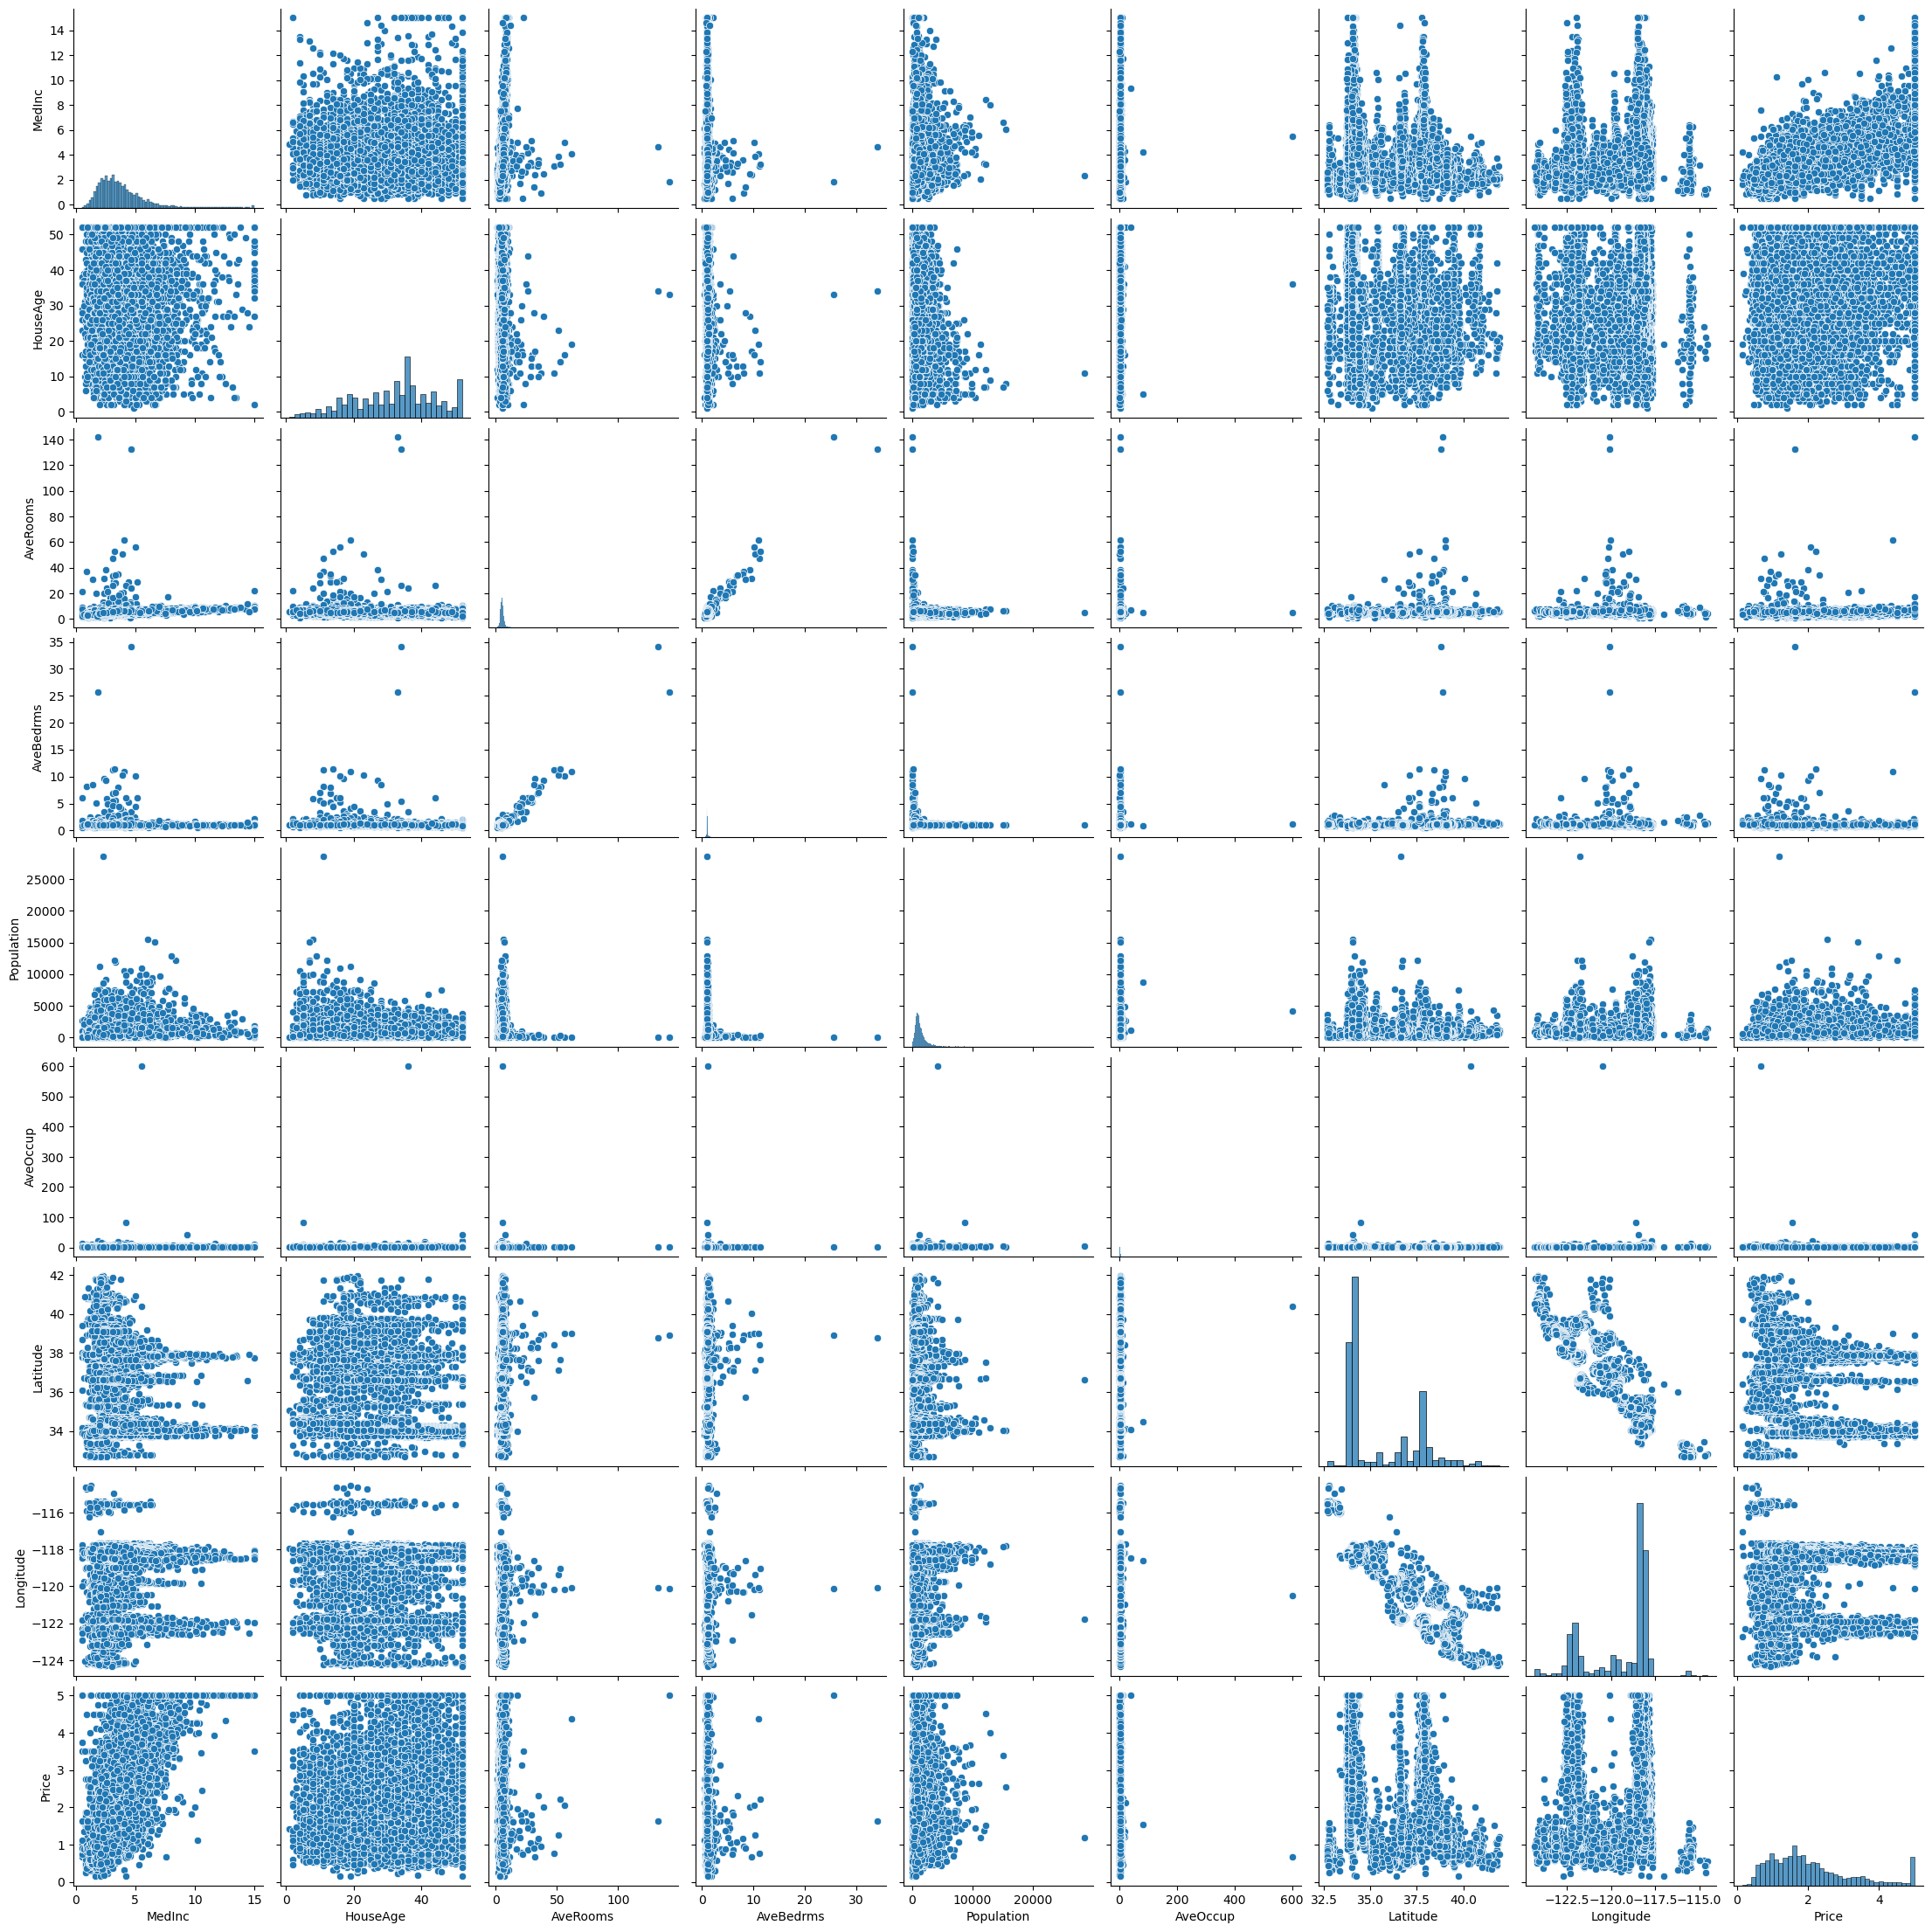

In [135]:
import seaborn as sns
sns.pairplot(dataset)

It is hard to Visualize Data so Better to understand different plots using regplot() in seaborn 

<Axes: >

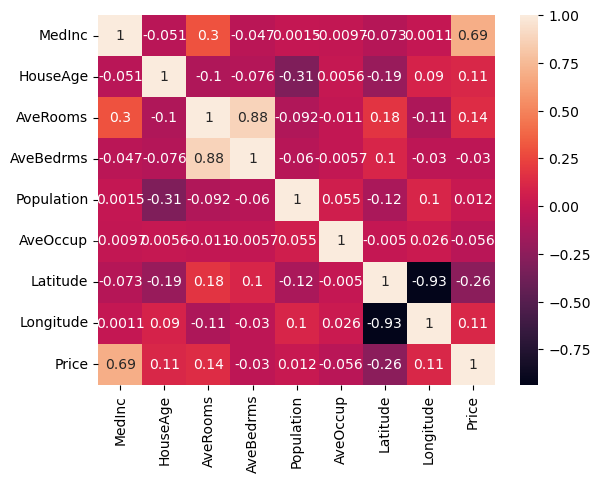

In [136]:
sns.heatmap(corr,annot=True)

<Axes: xlabel='MedInc', ylabel='Price'>

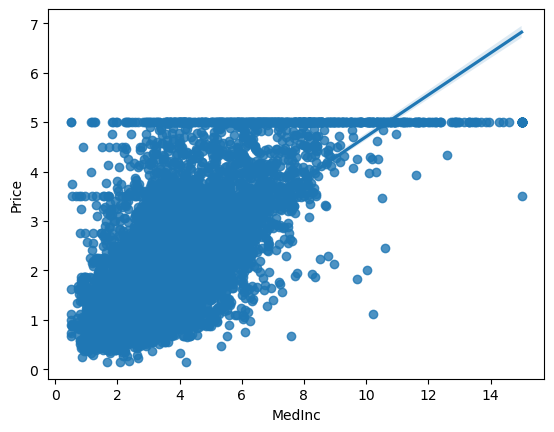

In [138]:
#Lets construct all possible different cases of correlations
sns.regplot(x="MedInc",y="Price",data=dataset)
#as income of household owner increases price of house also increases

<Axes: xlabel='MedInc', ylabel='Latitude'>

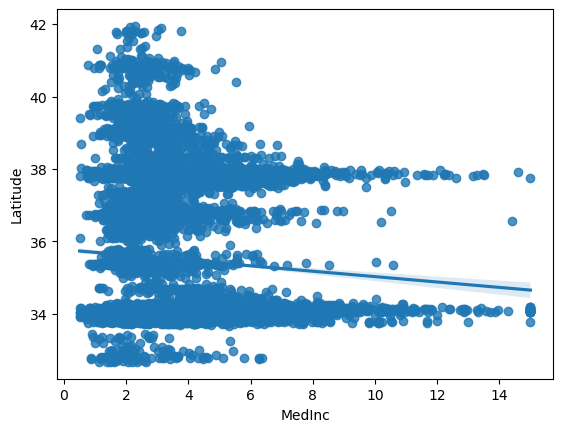

In [137]:
sns.regplot(x="MedInc",y="Latitude",data=dataset)
#We can see the latitude constant ranges between 36-38 and 32-34 for all possible median income of all household

<Axes: xlabel='AveRooms', ylabel='HouseAge'>

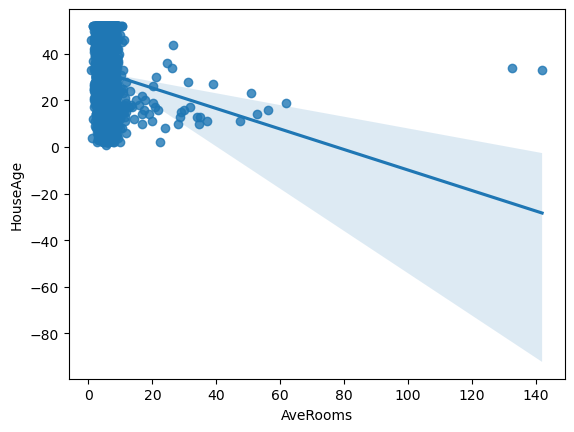

In [139]:
sns.regplot(x="AveRooms",y="HouseAge",data=dataset)
#YOu see how the plot is different from all it has outliers

<Axes: xlabel='MedInc', ylabel='Population'>

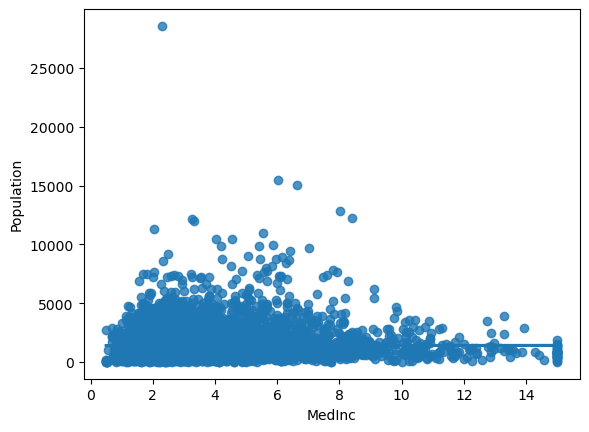

In [140]:
sns.regplot(x="MedInc",y="Population",data=dataset)
#There is no linearity it is constant one feature is not dependent  on other

DataFrame of Dependent and Independent Models

In [189]:
X = dataset.iloc[:,:-1] #Train data without features
Y = dataset.iloc[:,-1]

In [192]:
X.head() #X data 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [143]:
Y.head() # Y data

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

**Train-Test-Split**

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [145]:
X_train.shape,X_test.shape

((7000, 8), (3000, 8))

**Standardization Why Standardization?**

Internally we use gradient descent in linear regression main aim of gradient descent is to track global minima for that we need to bring all independ variable which are currently quantized in different units is to bring in a same unit

In [146]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

**Model Building**

In [147]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [148]:
#Print co-efficents and intercepts
#AS there were no.of.features it constructs hyper-plane while constructing model
print(model.coef_)
#The coefficients describe the variation of target variable

[ 0.85174714  0.06740811 -0.29673379  0.34560687 -0.00127036 -0.03913425
 -0.86008367 -0.69949038]


In [149]:
print(model.intercept_)

2.05240177571429


In [150]:
model.get_params
#on which parameters model is trained

<bound method BaseEstimator.get_params of LinearRegression()>

**Prediction**

In [151]:
Y_pred = model.predict(X_test)
Y_pred

array([1.62573839, 2.10915343, 3.21914603, ..., 1.28073271, 1.94763955,
       2.2705226 ])

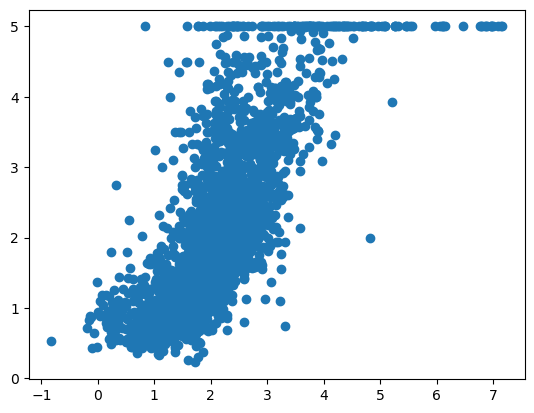

In [152]:
#Comparing prediction with real testing values
plt.scatter(Y_pred,Y_test)

In [153]:
#let's construct decision tree as model is not in linear
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=5,random_state=42)
dt_model.fit(X_train,Y_train)
y_pred_dt = dt_model.predict(X_test)

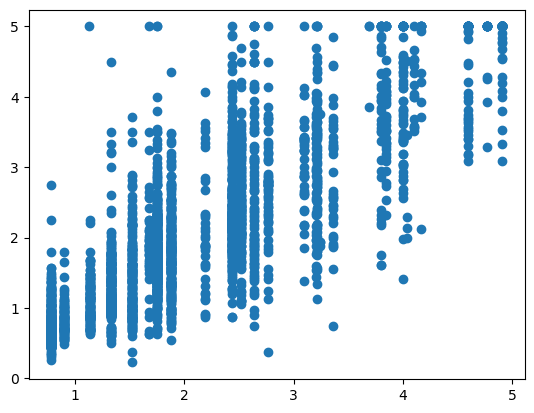

In [155]:
plt.scatter(y_pred_dt,Y_test)

In [157]:
residuals = Y_test-y_pred_dt
residuals

6252   -0.177180
4684   -0.884563
1731   -1.416174
4742   -0.170180
4521   -0.397180
          ...   
8014   -0.181760
1074    0.212441
3063   -0.196330
6487    0.013951
4705    0.748327
Name: Price, Length: 3000, dtype: float64

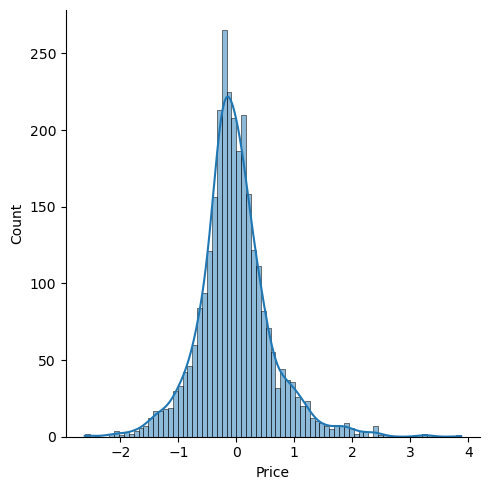

In [166]:
sns.displot(residuals,kde=True)
#Most of the differences between y_test and y_pred are between -2 to 4 which is good in predicting

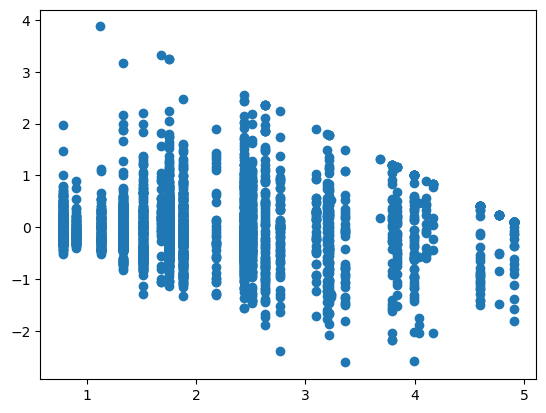

In [162]:
plt.scatter(y_pred_dt,residuals)
#Uniformly scattered

**Evaluation Metrics**

In [172]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_error
print('mean absoloute error: ',mean_absolute_error(Y_test,y_pred_dt))
print('mean squared error : ',mean_squared_error(Y_test,y_pred_dt))
print('root mean squared error : ',np.sqrt(mean_squared_error(Y_test,y_pred_dt)))
print('r2_score: ',r2_score(Y_test,y_pred_dt))

mean absoloute error:  0.45133066017657825
mean squared error :  0.3959877168377481
root mean squared error :  0.629275549213338
r2_score:  0.7011995811916985


In [178]:
1-(1-(r2_score(Y_test,y_pred_dt)))*(len(Y_test)-1)/(len(Y_test)-(X_test.shape[1])-1)

0.7004003824787375

**New Data Prediction**

In [184]:
m = housing.data[0].reshape(1,-1)
m

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [201]:
#Scaling should be done to avoid invalid values such as negative values like that
std_scaler.transform( housing.data[0].reshape(1,-1))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.40812852,  0.78136678,  0.56600349, -0.1167634 , -0.97081965,
        -0.07529813,  1.20124997, -1.51499957]])

In [217]:
dt_model.predict(std_scaler.transform( housing.data[0].reshape(1,-1)))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.09877889])

In [219]:
import pandas as pd

# Wrap one sample in a DataFrame with the correct column names
sample_df = pd.DataFrame([housing.data[0]], columns=housing.feature_names)

# Now scale and predict
scaled = std_scaler.transform(sample_df)
prediction = pickled_model.predict(scaled)

print(prediction)


[4.09877889]


**Pickling**

In [205]:
import pickle

In [211]:
pickle.dump(dt_model,open('decisiontreemodel.pkl','wb'))

In [212]:
#Unpacking model
pickled_model = pickle.load(open('decisiontreemodel.pkl','rb'))

In [218]:
pickled_model.predict(std_scaler.transform( housing.data[0].reshape(1,-1)))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.09877889])

In [220]:
import pickle
import pandas as pd
from sklearn.datasets import fetch_california_housing
# Load the model
with open('decisiontreemodel.pkl', 'rb') as f:
    pickled_model = pickle.load(f)
# Load the housing data (or load from wherever you trained it)
housing = fetch_california_housing()
# Wrap the input in a DataFrame to avoid the warning
sample_df = pd.DataFrame([housing.data[0]], columns=housing.feature_names)
# Transform using your already-fitted scaler
scaled = std_scaler.transform(sample_df)
# Predict using the loaded model
prediction = pickled_model.predict(scaled)
print(prediction)

[4.09877889]
